<a href="https://colab.research.google.com/github/DanayaDiarra/danaya_data/blob/master/Sales_forcasting_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn import metrics

In [ ]:
data = pd.read_csv("Grocery_Inventory.csv")
data.head()

,Product_Name,Catagory,Supplier_Name,Warehouse_Location,Status,Product_ID,Supplier_ID,Date_Received,Last_Order_Date,Expiration_Date,Stock_Quantity,Reorder_Level,Reorder_Quantity,Unit_Price,Sales_Volume,Inventory_Turnover_Rate,percentage
0,Bell Pepper,Fruits & Vegetables,Eimbee,20 Pennsylvania Parkway,Discontinued,29-017-6255,43-348-2450,3/1/2024,1/6/2025,1/31/2025,46,64,17,$4.60,96,55,1.96%
1,Vegetable Oil,Oils & Fats,Digitube,03643 Oakridge Lane,Backordered,79-569-8856,04-854-7165,4/1/2024,5/19/2024,6/11/2024,51,87,86,$2.00,24,83,0.91%
2,Parmesan Cheese,Dairy,BlogXS,73 Graedel Street,Discontinued,28-146-2641,82-995-0739,4/1/2024,12/21/2024,4/8/2024,38,67,66,$12.00,35,24,1.36%
3,Carrot,Fruits & Vegetables,Avaveo,44801 Myrtle Center,Discontinued,11-581-9869,22-867-3079,5/1/2024,12/12/2024,9/26/2024,51,60,98,$1.50,44,95,1.36%
4,Garlic,Fruits & Vegetables,Katz,6195 Monterey Center,Discontinued,13-202-4809,24-281-7685,5/1/2024,7/28/2024,5/20/2024,27,22,89,$7.00,91,77,2.17%


# **Exploratory Data Analysis**

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 990 entries, 0 to 989
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Product_Name             990 non-null    object
 1   Catagory                 989 non-null    object
 2   Supplier_Name            990 non-null    object
 3   Warehouse_Location       990 non-null    object
 4   Status                   990 non-null    object
 5   Product_ID               990 non-null    object
 6   Supplier_ID              990 non-null    object
 7   Date_Received            990 non-null    object
 8   Last_Order_Date          990 non-null    object
 9   Expiration_Date          990 non-null    object
 10  Stock_Quantity           990 non-null    int64 
 11  Reorder_Level            990 non-null    int64 
 12  Reorder_Quantity         990 non-null    int64 
 13  Unit_Price               990 non-null    object
 14  Sales_Volume             990 non-null    i

In [ ]:
data.describe().round(2)

,Stock_Quantity,Reorder_Level,Reorder_Quantity,Sales_Volume,Inventory_Turnover_Rate
count,990.00,990.00,990.00,990.00,990.00
mean,55.61,51.22,51.91,58.93,50.15
std,26.30,29.10,29.52,23.00,28.80
min,10.00,1.00,1.00,20.00,1.00
25%,33.00,25.25,25.00,39.00,25.00
50%,56.00,53.00,54.00,58.00,50.00
75%,79.00,77.00,77.00,78.00,74.75
max,100.00,100.00,100.00,100.00,100.00


In [ ]:
correl = data.select_dtypes(include=[float, int]).corr()
print(correl)

                         Stock_Quantity  Reorder_Level  Reorder_Quantity  \
Stock_Quantity                 1.000000      -0.021758         -0.022981   
Reorder_Level                 -0.021758       1.000000          0.025503   
Reorder_Quantity              -0.022981       0.025503          1.000000   
Sales_Volume                   0.032157       0.005078         -0.023691   
Inventory_Turnover_Rate        0.035849       0.001401         -0.060418   

                         Sales_Volume  Inventory_Turnover_Rate  
Stock_Quantity               0.032157                 0.035849  
Reorder_Level                0.005078                 0.001401  
Reorder_Quantity            -0.023691                -0.060418  
Sales_Volume                 1.000000                 0.062031  
Inventory_Turnover_Rate      0.062031                 1.000000  


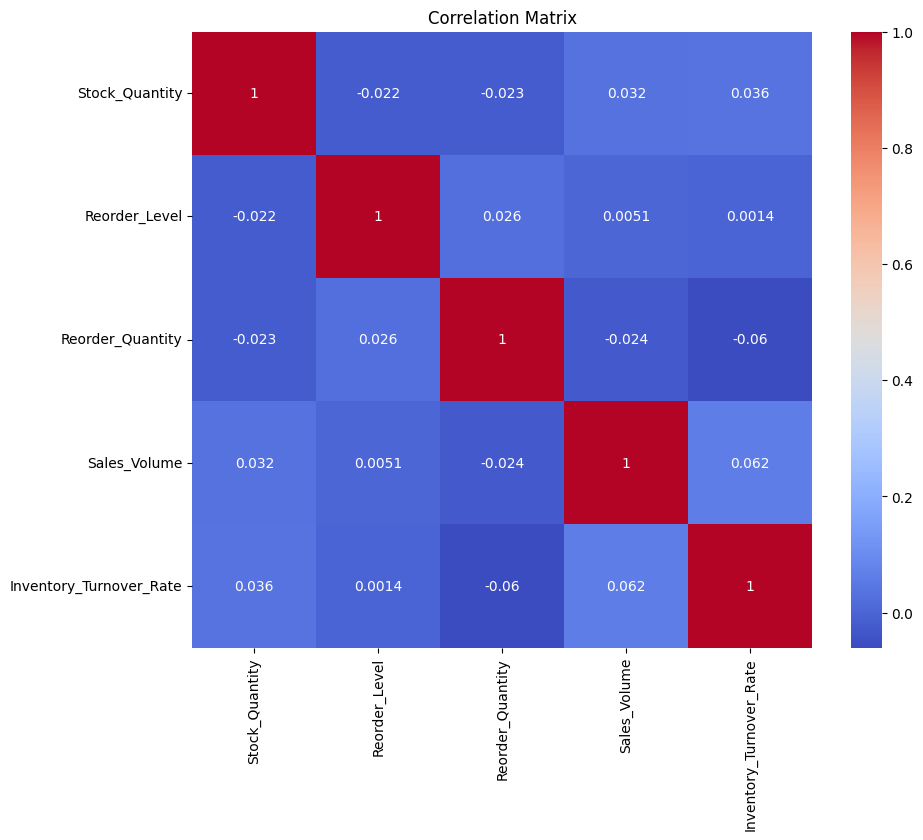

In [ ]:
plt.figure(figsize=(10, 8))
sns.heatmap(correl, annot= True, cmap = 'coolwarm')
plt.title('Correlation Matrix')
plt.show()

In [ ]:
import plotly.express as px
fig = px.imshow(correl.round(2),
                text_auto= True,
                color_continuous_scale='RdBu_r',
                aspect= 'auto',
                title='Correlation Matrix'

)

fig.show()

In [ ]:
data.head()

,Product_Name,Catagory,Supplier_Name,Warehouse_Location,Status,Product_ID,Supplier_ID,Date_Received,Last_Order_Date,Expiration_Date,Stock_Quantity,Reorder_Level,Reorder_Quantity,Unit_Price,Sales_Volume,Inventory_Turnover_Rate,percentage
0,Bell Pepper,Fruits & Vegetables,Eimbee,20 Pennsylvania Parkway,Discontinued,29-017-6255,43-348-2450,3/1/2024,1/6/2025,1/31/2025,46,64,17,$4.60,96,55,1.96%
1,Vegetable Oil,Oils & Fats,Digitube,03643 Oakridge Lane,Backordered,79-569-8856,04-854-7165,4/1/2024,5/19/2024,6/11/2024,51,87,86,$2.00,24,83,0.91%
2,Parmesan Cheese,Dairy,BlogXS,73 Graedel Street,Discontinued,28-146-2641,82-995-0739,4/1/2024,12/21/2024,4/8/2024,38,67,66,$12.00,35,24,1.36%
3,Carrot,Fruits & Vegetables,Avaveo,44801 Myrtle Center,Discontinued,11-581-9869,22-867-3079,5/1/2024,12/12/2024,9/26/2024,51,60,98,$1.50,44,95,1.36%
4,Garlic,Fruits & Vegetables,Katz,6195 Monterey Center,Discontinued,13-202-4809,24-281-7685,5/1/2024,7/28/2024,5/20/2024,27,22,89,$7.00,91,77,2.17%


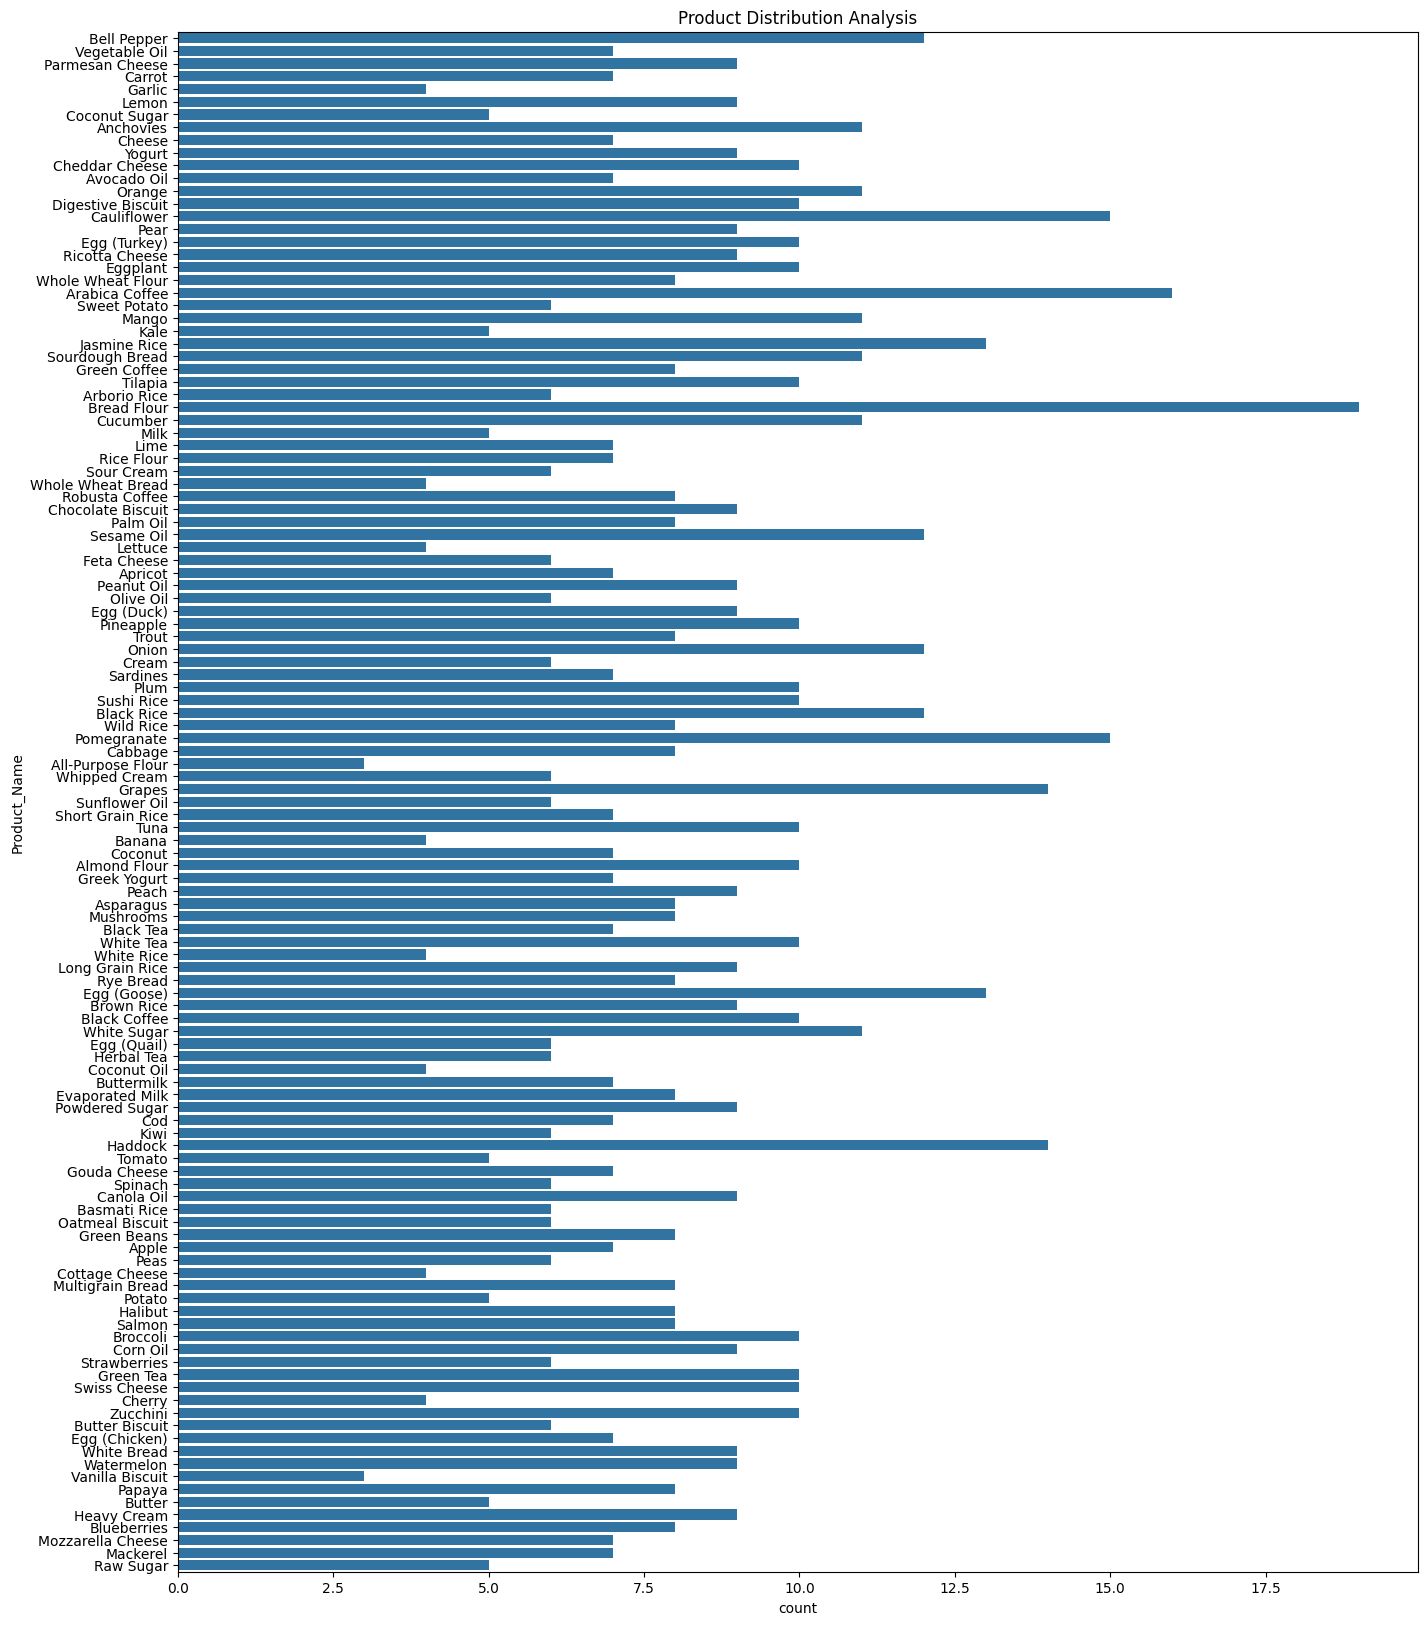

In [ ]:
# Viz of Product_Name
plt.figure(figsize= (16, 20))
sns.countplot(data['Product_Name'])
plt.title('Product Distribution Analysis')
plt.show()

In [ ]:
fig = px.histogram(data, x='Product_Name', nbins= 50, title='Product Distribution Analysis')
fig.update_layout(width = 1500, height =  700)
fig.show()

In [ ]:
fig = px.histogram(data, x= 'Catagory', nbins=70, title = 'Product Category Analysis')
fig.update_layout(width = 800, height = 600)
fig.show()

In [ ]:
data['Supplier_Name'].value_counts()

,count
Supplier_Name,
Katz,12
Meevee,10
Quatz,9
Twitterwire,7
Vinder,7
...,...
Brainbox,1
Fanoodle,1
Edgeclub,1


In [ ]:
fig = px.histogram(data , x='Supplier_Name', nbins=30, title='Supplier Analysis')
fig.update_layout(width = 1800, height = 700)
fig.show()

In [ ]:
fig = px.histogram(data, x='Status', nbins= 50, title='Product Status Analysis')
fig.update_layout(width = 800, height = 700)
fig.show()

In [ ]:
data.head()

,Product_Name,Catagory,Supplier_Name,Warehouse_Location,Status,Product_ID,Supplier_ID,Date_Received,Last_Order_Date,Expiration_Date,Stock_Quantity,Reorder_Level,Reorder_Quantity,Unit_Price,Sales_Volume,Inventory_Turnover_Rate,percentage
0,Bell Pepper,Fruits & Vegetables,Eimbee,20 Pennsylvania Parkway,Discontinued,29-017-6255,43-348-2450,3/1/2024,1/6/2025,1/31/2025,46,64,17,$4.60,96,55,1.96%
1,Vegetable Oil,Oils & Fats,Digitube,03643 Oakridge Lane,Backordered,79-569-8856,04-854-7165,4/1/2024,5/19/2024,6/11/2024,51,87,86,$2.00,24,83,0.91%
2,Parmesan Cheese,Dairy,BlogXS,73 Graedel Street,Discontinued,28-146-2641,82-995-0739,4/1/2024,12/21/2024,4/8/2024,38,67,66,$12.00,35,24,1.36%
3,Carrot,Fruits & Vegetables,Avaveo,44801 Myrtle Center,Discontinued,11-581-9869,22-867-3079,5/1/2024,12/12/2024,9/26/2024,51,60,98,$1.50,44,95,1.36%
4,Garlic,Fruits & Vegetables,Katz,6195 Monterey Center,Discontinued,13-202-4809,24-281-7685,5/1/2024,7/28/2024,5/20/2024,27,22,89,$7.00,91,77,2.17%


In [ ]:
fig = px.histogram(data, x ='Stock_Quantity',nbins =50, title= 'Stock Evolution' )
fig.update_layout(width = 1800, height = 700)
fig.show()

In [ ]:
fig = px.line(data, x='Date_Received', y='Sales_Volume', title='Sales Trends')
fig.update_layout(width =  1800, height = 700)
fig.show()


# **Data PreProcessing**






**Handling missing values**

In [ ]:
data.isna().sum()

,0
Product_Name,0
Catagory,1
Supplier_Name,0
Warehouse_Location,0
Status,0
Product_ID,0
Supplier_ID,0
Date_Received,0
Last_Order_Date,0
Expiration_Date,0


In [ ]:
print(data['Catagory'].mode())

0    Fruits & Vegetables
Name: Catagory, dtype: object


In [ ]:
#Filling missing values in "Catagory" column
data['Catagory'] = data['Catagory'].fillna(data['Catagory'].mode()[0])

In [ ]:
data.isna().sum()

,0
Product_Name,0
Catagory,0
Supplier_Name,0
Warehouse_Location,0
Status,0
Product_ID,0
Supplier_ID,0
Date_Received,0
Last_Order_Date,0
Expiration_Date,0


In [ ]:
data.head()

,Product_Name,Catagory,Supplier_Name,Warehouse_Location,Status,Product_ID,Supplier_ID,Date_Received,Last_Order_Date,Expiration_Date,Stock_Quantity,Reorder_Level,Reorder_Quantity,Unit_Price,Sales_Volume,Inventory_Turnover_Rate,percentage
0,Bell Pepper,Fruits & Vegetables,Eimbee,20 Pennsylvania Parkway,Discontinued,29-017-6255,43-348-2450,3/1/2024,1/6/2025,1/31/2025,46,64,17,$4.60,96,55,1.96%
1,Vegetable Oil,Oils & Fats,Digitube,03643 Oakridge Lane,Backordered,79-569-8856,04-854-7165,4/1/2024,5/19/2024,6/11/2024,51,87,86,$2.00,24,83,0.91%
2,Parmesan Cheese,Dairy,BlogXS,73 Graedel Street,Discontinued,28-146-2641,82-995-0739,4/1/2024,12/21/2024,4/8/2024,38,67,66,$12.00,35,24,1.36%
3,Carrot,Fruits & Vegetables,Avaveo,44801 Myrtle Center,Discontinued,11-581-9869,22-867-3079,5/1/2024,12/12/2024,9/26/2024,51,60,98,$1.50,44,95,1.36%
4,Garlic,Fruits & Vegetables,Katz,6195 Monterey Center,Discontinued,13-202-4809,24-281-7685,5/1/2024,7/28/2024,5/20/2024,27,22,89,$7.00,91,77,2.17%


**Label Encoding**

In [ ]:
from category_encoders.ordinal import OrdinalEncoder
label_encoder = OrdinalEncoder(cols=['Product_Name', 'Catagory', 'Supplier_Name', 'Warehouse_Location', 'Status'])
data = label_encoder.fit_transform(data)
data

,Product_Name,Catagory,Supplier_Name,Warehouse_Location,Status,Product_ID,Supplier_ID,Date_Received,Last_Order_Date,Expiration_Date,Stock_Quantity,Reorder_Level,Reorder_Quantity,Unit_Price,Sales_Volume,Inventory_Turnover_Rate,percentage
0,1,1,1,1,1,29-017-6255,43-348-2450,3/1/2024,1/6/2025,1/31/2025,46,64,17,$4.60,96,55,1.96%
1,2,2,2,2,2,79-569-8856,04-854-7165,4/1/2024,5/19/2024,6/11/2024,51,87,86,$2.00,24,83,0.91%
2,3,3,3,3,1,28-146-2641,82-995-0739,4/1/2024,12/21/2024,4/8/2024,38,67,66,$12.00,35,24,1.36%
3,4,1,4,4,1,11-581-9869,22-867-3079,5/1/2024,12/12/2024,9/26/2024,51,60,98,$1.50,44,95,1.36%
4,5,1,5,5,1,13-202-4809,24-281-7685,5/1/2024,7/28/2024,5/20/2024,27,22,89,$7.00,91,77,2.17%
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
985,3,3,350,986,2,67-984-5368,39-714-7313,9/27/2024,10/4/2024,7/28/2024,52,56,34,$12.00,31,69,024%
986,121,4,152,987,3,44-782-1395,54-132-9762,9/29/2024,6/26/2024,11/17/2024,72,72,68,$1.50,39,78,-123%
987,57,1,80,988,1,75-927-9108,27-406-7972,9/29/2024,6/17/2024,7/2/2024,24,32,17,$1.00,55,72,-100%
988,95,1,324,989,1,78-614-4402,51-014-4287,9/30/2024,2/14/2025,4/25/2024,81,99,28,$2.00,20,85,-031%


In [ ]:

data

,Product_Name,Catagory,Supplier_Name,Warehouse_Location,Status,Product_ID,Supplier_ID,Date_Received,Last_Order_Date,Expiration_Date,Stock_Quantity,Reorder_Level,Reorder_Quantity,Unit_Price,Sales_Volume,Inventory_Turnover_Rate,percentage
0,1,1,1,1,1,29-017-6255,43-348-2450,3/1/2024,1/6/2025,1/31/2025,46,64,17,$4.60,96,55,1.96%
1,2,2,2,2,2,79-569-8856,04-854-7165,4/1/2024,5/19/2024,6/11/2024,51,87,86,$2.00,24,83,0.91%
2,3,3,3,3,1,28-146-2641,82-995-0739,4/1/2024,12/21/2024,4/8/2024,38,67,66,$12.00,35,24,1.36%
3,4,1,4,4,1,11-581-9869,22-867-3079,5/1/2024,12/12/2024,9/26/2024,51,60,98,$1.50,44,95,1.36%
4,5,1,5,5,1,13-202-4809,24-281-7685,5/1/2024,7/28/2024,5/20/2024,27,22,89,$7.00,91,77,2.17%
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
985,3,3,350,986,2,67-984-5368,39-714-7313,9/27/2024,10/4/2024,7/28/2024,52,56,34,$12.00,31,69,024%
986,121,4,152,987,3,44-782-1395,54-132-9762,9/29/2024,6/26/2024,11/17/2024,72,72,68,$1.50,39,78,-123%
987,57,1,80,988,1,75-927-9108,27-406-7972,9/29/2024,6/17/2024,7/2/2024,24,32,17,$1.00,55,72,-100%
988,95,1,324,989,1,78-614-4402,51-014-4287,9/30/2024,2/14/2025,4/25/2024,81,99,28,$2.00,20,85,-031%


In [ ]:
data['Unit_Price'] = data['Unit_Price'].replace('[\$,]', '', regex=True).astype(float)
data['percentage'] = data['percentage'].replace('[\%,]', '', regex=True).astype(float)

# **ML Model**

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

**Data Split**

In [ ]:
# Features
X = data.drop(columns=['Product_ID', 'Supplier_ID', 'Date_Received', 'Last_Order_Date', 'Expiration_Date'], axis= 1)
X

,Product_Name,Catagory,Supplier_Name,Warehouse_Location,Status,Stock_Quantity,Reorder_Level,Reorder_Quantity,Unit_Price,Sales_Volume,Inventory_Turnover_Rate,percentage
0,1,1,1,1,1,46,64,17,4.6,96,55,1.96
1,2,2,2,2,2,51,87,86,2.0,24,83,0.91
2,3,3,3,3,1,38,67,66,12.0,35,24,1.36
3,4,1,4,4,1,51,60,98,1.5,44,95,1.36
4,5,1,5,5,1,27,22,89,7.0,91,77,2.17
...,...,...,...,...,...,...,...,...,...,...,...,...
985,3,3,350,986,2,52,56,34,12.0,31,69,24.00
986,121,4,152,987,3,72,72,68,1.5,39,78,-123.00
987,57,1,80,988,1,24,32,17,1.0,55,72,-100.00
988,95,1,324,989,1,81,99,28,2.0,20,85,-31.00


In [ ]:
# Target
Y = data['Sales_Volume']
Y

,Sales_Volume
0,96
1,24
2,35
3,44
4,91
...,...
985,31
986,39
987,55
988,20


**Train_Test_Split**

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size= 0.2, random_state=2)

In [ ]:
print(f'X_train:{X_train.shape}')
print(f'X_test:{X_test.shape}')
print(f'Y_train:{Y_train.shape}')
print(f'Y_test:{Y_test.shape}')





X_train:(792, 12)
X_test:(198, 12)
Y_train:(792,)
Y_test:(198,)


# **Model 1**
linear regression

In [ ]:
#Model training
model = LinearRegression()

In [ ]:
model.fit(X_train, Y_train)

LinearRegression()

 **Prediction**

In [ ]:
predict = model.predict(X_test)
predict

array([ 24.,  90.,  67.,  61.,  68.,  61.,  48.,  65.,  67.,  56.,  94.,
        80.,  85.,  58.,  55.,  63.,  90.,  62.,  32.,  89.,  23.,  54.,
        63.,  52.,  43.,  29.,  38.,  90.,  66.,  85.,  39.,  69.,  88.,
        85.,  93.,  89.,  23.,  47.,  32.,  61.,  76.,  33.,  29.,  69.,
        89.,  96.,  32.,  33.,  27.,  50.,  29.,  96.,  42.,  30.,  59.,
        53.,  25.,  91.,  35.,  37.,  64.,  44.,  69.,  91.,  40.,  38.,
        64.,  69.,  21.,  95.,  52.,  47.,  75.,  47.,  98.,  46.,  66.,
        22.,  30.,  26.,  84.,  33.,  40.,  81.,  89.,  89.,  42.,  61.,
        45.,  28.,  98.,  60.,  46.,  73.,  65.,  53.,  39.,  40.,  49.,
        92.,  21.,  79.,  50.,  20.,  95.,  70.,  34.,  48.,  66.,  90.,
        74.,  94.,  96.,  51.,  30.,  38.,  49.,  83.,  26.,  33.,  25.,
        92.,  93., 100.,  92.,  79., 100.,  98.,  48.,  86.,  51.,  96.,
        57.,  47.,  46.,  56.,  30.,  54.,  86.,  98.,  70.,  46.,  20.,
        66.,  70.,  86.,  59.,  71.,  32.,  60.,  9

 **Evaluation**

In [ ]:
mse = mean_squared_error(Y_test, predict)
rmse = mse ** 0.5
r2 = metrics.r2_score(Y_test, predict)
print(f'RMSE: {rmse:.2f}')
print(f'R2_score: {r2:.2f}')

RMSE: 0.00
R2_score: 1.00


# **Model 2**
RandomForestRegressor

**Training**

In [ ]:
# Initialize the model
rf = RandomForestRegressor(n_estimators=100, random_state=42)

In [ ]:
# Fit the model
rf.fit(X_train, Y_train)

RandomForestRegressor(random_state=42)

**Prediction**

In [ ]:

predictions = rf.predict(X_test)
predictions

array([24.  , 90.01, 67.01, 61.  , 67.98, 61.  , 48.01, 65.01, 67.03,
       56.  , 93.99, 80.  , 85.01, 58.  , 55.01, 63.  , 89.98, 62.  ,
       31.98, 88.91, 23.  , 54.  , 63.  , 52.  , 43.02, 28.96, 38.01,
       89.99, 66.  , 85.02, 39.  , 68.99, 88.03, 85.01, 93.01, 88.93,
       23.02, 47.  , 32.  , 61.  , 75.98, 32.99, 28.98, 68.97, 88.98,
       96.  , 31.98, 32.99, 27.01, 50.  , 29.  , 96.01, 42.  , 30.  ,
       59.  , 53.  , 25.01, 91.01, 35.  , 36.99, 64.02, 44.01, 68.96,
       91.01, 40.03, 38.01, 64.02, 68.96, 20.95, 95.  , 52.  , 47.  ,
       75.  , 47.  , 98.08, 46.  , 65.95, 22.02, 30.  , 26.  , 84.02,
       32.99, 40.02, 81.  , 88.95, 88.95, 42.  , 61.  , 45.  , 28.05,
       98.05, 60.  , 46.  , 72.97, 65.01, 53.  , 38.99, 40.02, 48.99,
       91.99, 20.96, 79.01, 50.  , 20.06, 95.  , 69.98, 34.  , 48.  ,
       65.99, 89.99, 74.01, 93.99, 96.04, 51.  , 30.  , 38.01, 48.99,
       83.02, 25.99, 33.  , 25.  , 91.98, 93.02, 99.94, 91.97, 79.  ,
       99.98, 98.09,

 **Evaluation**

In [ ]:

mse = mean_squared_error(Y_test, predictions)
rmse = mse ** 0.5
r2 = r2_score(Y_test, predictions)

print(f'RMSE: {rmse:.2f}')
print(f'R2 Score: {r2:.2f}')

RMSE: 0.02
R2 Score: 1.00


# **Conclusion**:



**RMSE (Root Mean Square Error)** values are very close to zero, indicating tiny prediction errors.


**R² (R-squared)** scores are exactly  1.00, suggesting the model explains nearly all the variance in the data.

??????????????


This often points to a very well-fitted model, though it can sometimes hint at overfitting if the dataset is small or too simple.